# **Lufthansa scenario**

In [1]:
from utils.utils import *
from utils.data import *
import os

### 1. Hypothesis (to be modified)

In [2]:
# Emissions de CO2 en 2023
CO2_2023 = 22.0 * 10**6        # tCO2/an

# Hypothèses flotte A320
nbr_old_start = 126
nbr_new_start = 39
replacement_nbr = 17
em_reduction_rate = 0.15
nbr_add_annual = 0

# Part du marché dans l'UE
market_eu = 0.43

# Augmentation des emissions en tC02 / an
CO2_supp = 0       # tCO2/an

# Période considérée
debut = 2023
fin = 2030

# Allowance gratuite en 2023 : émissions de CO2 2023
allowance_free_2023 = CO2_2023 * market_eu

### 2. Data

In [3]:
# Tableau des émissions mondiales / an
volume_carbu_an, CO2_emission = fleet_carbu(debut, fin, CO2_2023, nbr_old_start, nbr_new_start, replacement_nbr, em_reduction_rate, nbr_add_annual)

# Tableau des émissions dans l'UE / an
emission_euets_luft = np.array([round(market_eu * i,2) for i in CO2_emission])
volume_euets_luft = np.array([round(market_eu*i,2) for i in volume_carbu_an])

# Objectifs incorporations saf EU
incorpo_saf_eu = np.concatenate((np.linspace(obj_2023, obj_2025, 2025-debut+1)[:-1],
                                 np.linspace(obj_2025, obj_2030, fin-2025+1)))

# Quotas carbone
quota_eu = np.array([quota_2023, quota_2024, quota_2025, quota_2026, 0, 0, 0, 0])

# Carbon price
carbonprice = np.linspace(carbonprice_2023, carbonprice_2030, fin-debut+1)

### 3. Incorporation rate (to be modified)

In [4]:
# Incorporations
incorpo_2023 = 0              # *100 %
incorpo_2024 = 0.05           # *100 %
incorpo_2025 = 0.10           # *100 %
incorpo_2026 = 0.15           # *100 %
incorpo_2027 = 0.20           # *100 %
incorpo_2028 = 0.30           # *100 %
incorpo_2029 = 0.40           # *100 %
incorpo_2030 = 0.50           # *100 %

incorpo_saf = np.array([incorpo_2023, incorpo_2024, incorpo_2025, incorpo_2026, incorpo_2027, incorpo_2028, incorpo_2029, incorpo_2030])


### 4. Computation

In [5]:
C_MP_k, C_CO2_k, C_MP_SAF, R_UE, C_MP_k0, C_CO2_k0 = calculs_with_saf(debut, fin, volume_euets_luft,incorpo_saf_eu, allowance_free_2023, quota_eu, carbonprice, price_saf, price_kero, allowance_SAF)

### 5. Graphs

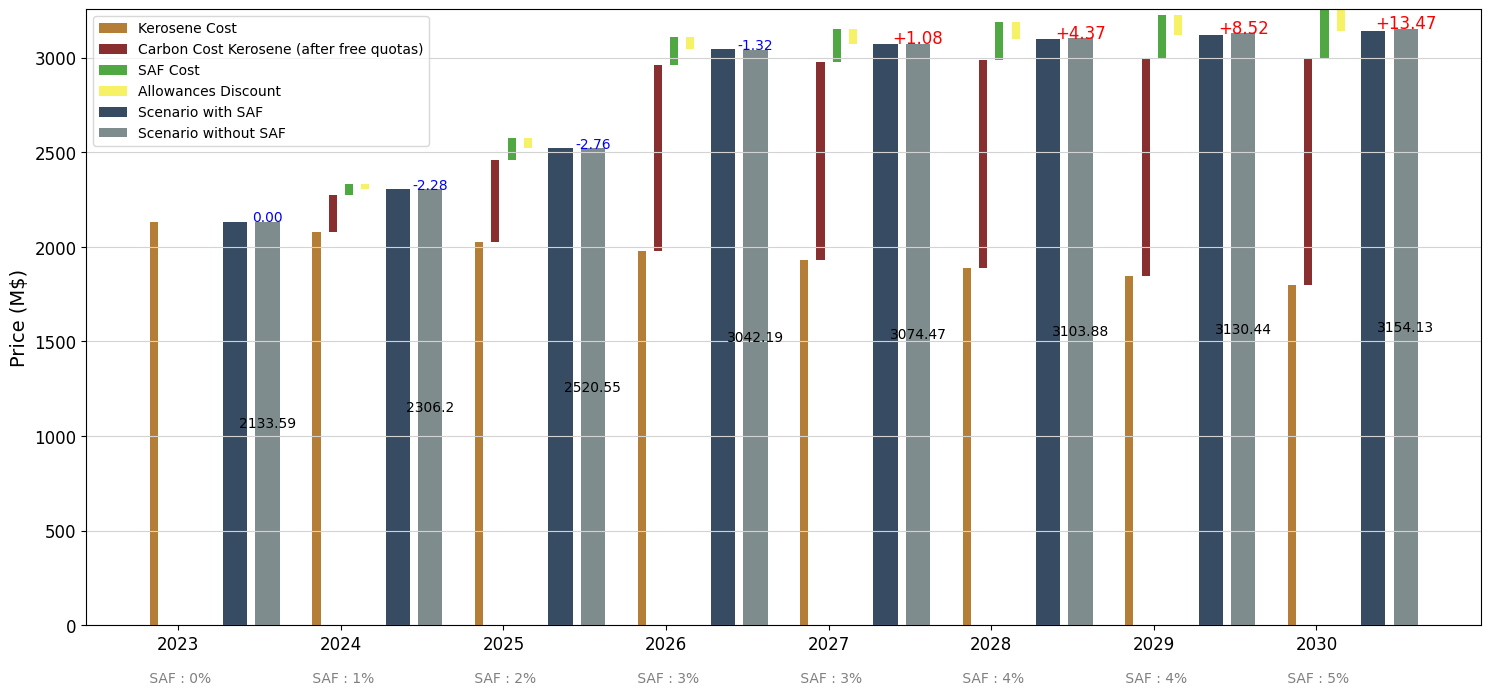

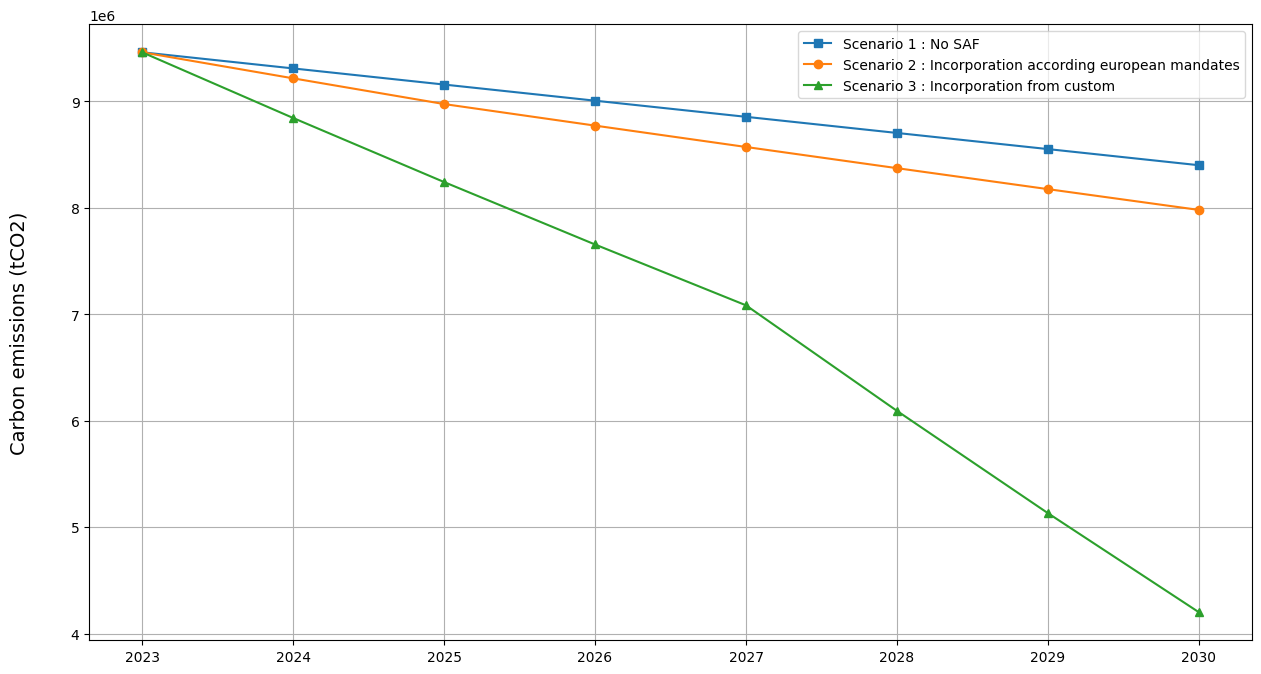

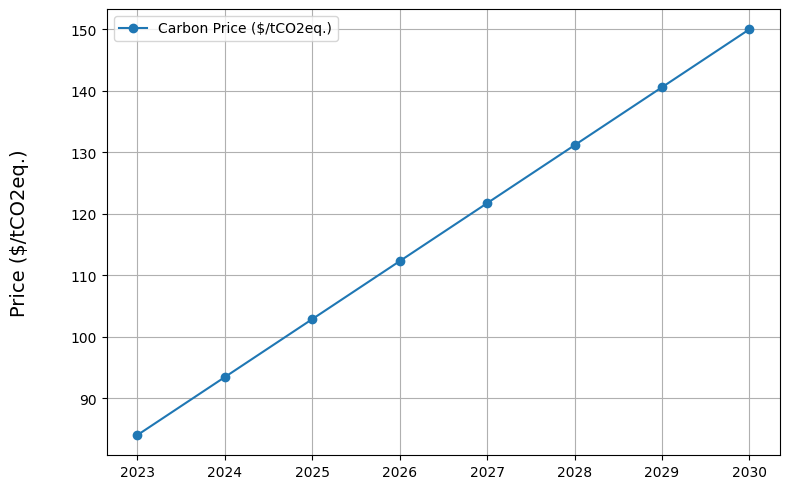

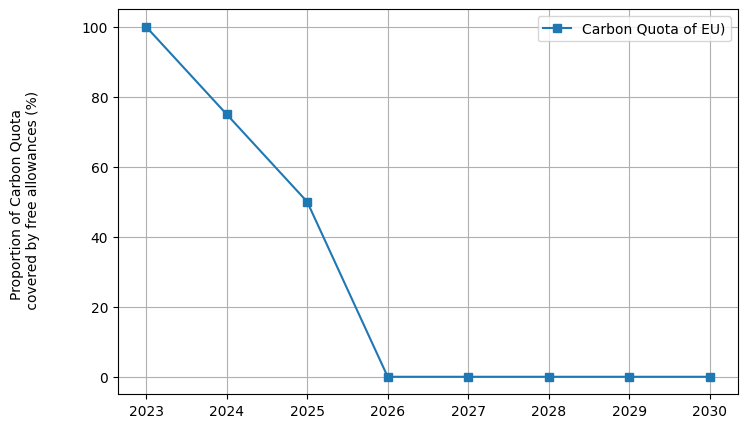

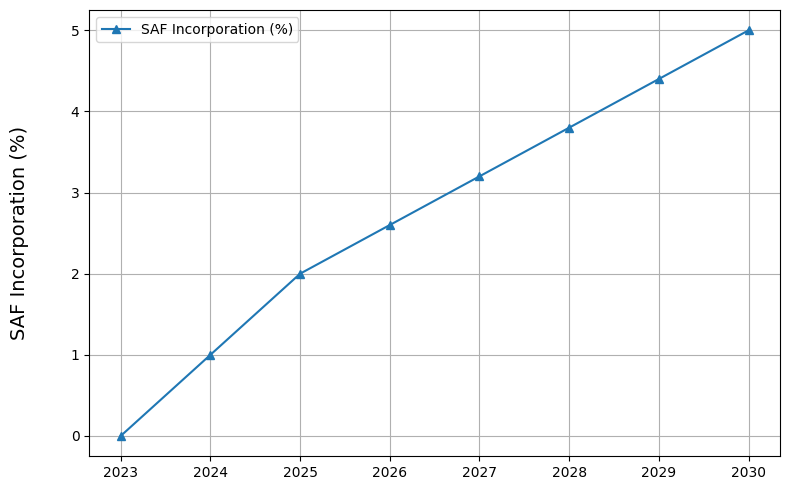

In [6]:
labels = ['Kerosene Cost',
          'Carbon Cost Kerosene (after free quotas)',
          'SAF Cost',
          'Allowances Discount',
          'Scenario with SAF',
          'Scenario without SAF']

data = np.array([np.round(C_MP_k/1000000,2),
                 np.round(C_CO2_k/1000000,2),
                 np.round(C_MP_SAF/1000000,2),
                 np.round(R_UE/1000000,2),
                 np.round((C_MP_k+C_CO2_k+C_MP_SAF+R_UE)/1000000,2),
                 np.round((C_MP_k0 + C_CO2_k0)/1000000,2)])

if __name__ == '__main__':
    dossier = "luft_plots"
    if not os.path.exists(dossier):
        os.makedirs(dossier)
    graphique(data, labels, debut, fin, incorpo_saf_eu, 'luft_cost_previsions', dossier)
    graphique_emissionscarbone(emission_euets_luft, incorpo_saf_eu, incorpo_saf, 'luft_carbon_emissions',dossier)
    graphique_hypotheses(debut, fin, carbonprice, quota_eu, incorpo_saf_eu, 'luft_price_hyp','luft_carb_hyp','luft_saf_incorpo', dossier)